In [207]:
# Importing necessary libraries
import numpy as np  # For numerical computing
import pandas as pd  # For data manipulation using DataFrames
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.compose import ColumnTransformer  # For applying transformers to columns of an array or DataFrame
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler  # For one-hot encoding and feature scaling
from sklearn.ensemble import RandomForestClassifier  # For random forest classification
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score  # For evaluating classification accuracy
from xgboost import XGBClassifier  # For XGBoost classification
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.ensemble import RandomForestClassifier  # For random forest classification (duplicate import)
from sklearn.svm import SVC  # For support vector machine classification
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classification
from sklearn.linear_model import LogisticRegression  # For logistic regression classification
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search
from sklearn.metrics import classification_report  # For detailed classification report
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets using SMOTE
from sklearn.impute import KNNImputer  # For KNN-based imputation


In [208]:
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv("data/raw/churn.csv")

In [209]:
# Displaying the first few rows of the DataFrame
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [210]:
# Displaying information about the DataFrame, including data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [211]:
# Generating descriptive statistics for the DataFrame
df.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [212]:
# Checking for missing values in the DataFrame and displaying the count per column
df.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [213]:
# Checking for duplicated rows in the DataFrame and displaying the count
df.duplicated().sum()


0

In [214]:
# Displaying the shape of the DataFrame (number of rows, number of columns)
df.shape


(10000, 12)

In [215]:
# Using LabelEncoder to encode categorical variables in specified columns
le = LabelEncoder()

# Columns to encode
columns_to_encode = ["country", "gender"]

# Applying LabelEncoder to each specified column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


In [216]:
# Lists of numeric and categorical features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender', 'credit_card', 'active_member']


<Axes: >

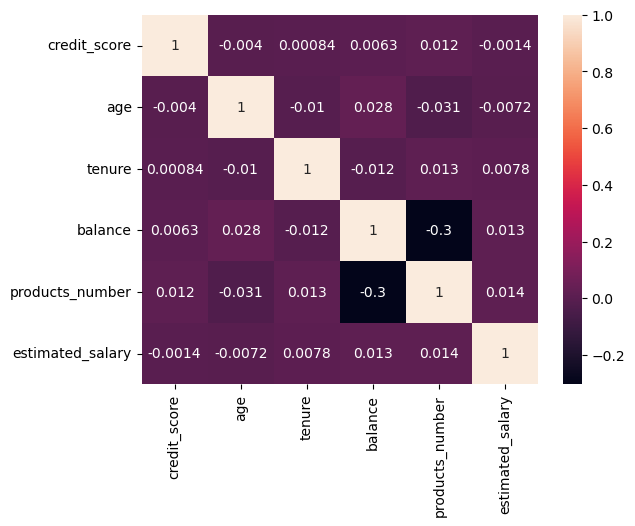

In [217]:
# Creating a heatmap to visualize the correlation matrix of numeric features
sns.heatmap(df[numeric_features].corr(), annot=True)


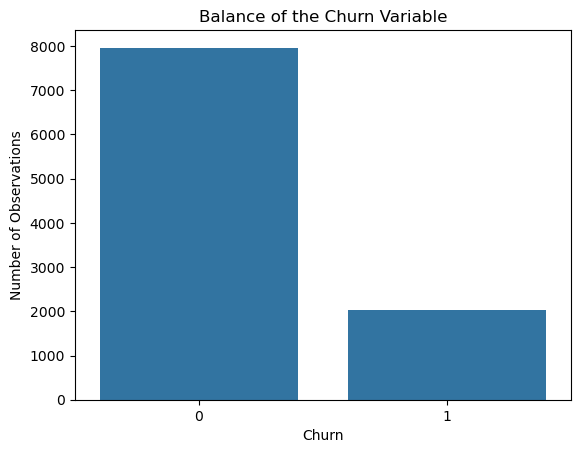

In [218]:
# Creating a countplot to visualize the distribution of the "churn" variable
sns.countplot(x="churn", data=df)
plt.xlabel('Churn')
plt.ylabel('Number of Observations')
plt.title('Balance of the Churn Variable')
plt.show()


In [219]:
# Dropping the "customer_id" column
df.drop("customer_id", axis=1, inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("churn", axis=1), df["churn"], test_size=0.3, random_state=42)


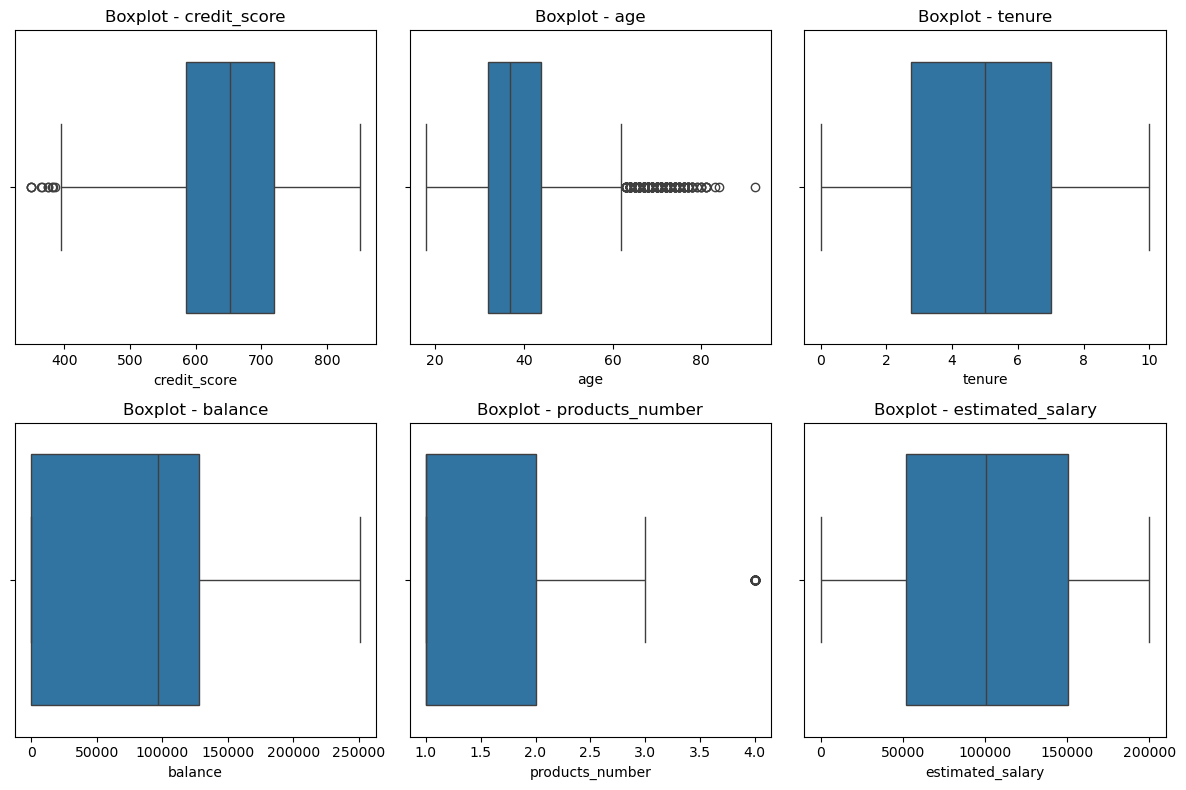

In [220]:
# Creating boxplots for numeric variables
plt.figure(figsize=(12, 8))

# Enumerating through numeric features and creating subplots
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Creating a subplot in a 2x3 grid
    sns.boxplot(x=X_train[feature])  # Creating a boxplot for the current feature
    plt.title(f'Boxplot - {feature}')  # Adding a title to the subplot

plt.tight_layout()  # Adjusting layout for better spacing
plt.show()  # Displaying the boxplots


In [221]:
"""
# Select the variables for outlier identification
outlier_features = ['age', 'credit_score']

# Create a copy of the data to avoid modifications to the original DataFrame
X_train_outliers_removed = X_train.copy()

# Identify and remove outliers using boxplot metrics
for feature in outlier_features:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (X_train[feature] < lower_bound) | (X_train[feature] > upper_bound)

    X_train_outliers_removed.loc[outliers, feature] = np.nan

# Create the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputer to fill NaNs
X_train_outliers_removed_imputed = knn_imputer.fit_transform(X_train_outliers_removed)

# Convert the result back to a DataFrame
X_train = pd.DataFrame(X_train_outliers_removed_imputed, columns=X_train_outliers_removed.columns)
"""

"\n# Select the variables for outlier identification\noutlier_features = ['age', 'credit_score']\n\n# Create a copy of the data to avoid modifications to the original DataFrame\nX_train_outliers_removed = X_train.copy()\n\n# Identify and remove outliers using boxplot metrics\nfor feature in outlier_features:\n    Q1 = X_train[feature].quantile(0.25)\n    Q3 = X_train[feature].quantile(0.75)\n    IQR = Q3 - Q1\n\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    outliers = (X_train[feature] < lower_bound) | (X_train[feature] > upper_bound)\n\n    X_train_outliers_removed.loc[outliers, feature] = np.nan\n\n# Create the KNN Imputer\nknn_imputer = KNNImputer(n_neighbors=5)\n\n# Apply KNN Imputer to fill NaNs\nX_train_outliers_removed_imputed = knn_imputer.fit_transform(X_train_outliers_removed)\n\n# Convert the result back to a DataFrame\nX_train = pd.DataFrame(X_train_outliers_removed_imputed, columns=X_train_outliers_removed.columns)\n"

In [222]:
"""
# Creating boxplots for numeric variables after outlier removal and imputation
plt.figure(figsize=(12, 8))

# Enumerating through numeric features and creating subplots
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Creating a subplot in a 2x3 grid
    sns.boxplot(x=X_train[feature])  # Creating a boxplot for the current feature
    plt.title(f'Boxplot - {feature}')  # Adding a title to the subplot

plt.tight_layout()  # Adjusting layout for better spacing
plt.show()  # Displaying the boxplots
"""

"\n# Creating boxplots for numeric variables after outlier removal and imputation\nplt.figure(figsize=(12, 8))\n\n# Enumerating through numeric features and creating subplots\nfor i, feature in enumerate(numeric_features, 1):\n    plt.subplot(2, 3, i)  # Creating a subplot in a 2x3 grid\n    sns.boxplot(x=X_train[feature])  # Creating a boxplot for the current feature\n    plt.title(f'Boxplot - {feature}')  # Adding a title to the subplot\n\nplt.tight_layout()  # Adjusting layout for better spacing\nplt.show()  # Displaying the boxplots\n"

In [223]:
# Applying SMOTE to balance the class distribution in the training set
"""smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)"""

'smote = SMOTE(random_state=42)\nX_train, y_train = smote.fit_resample(X_train, y_train)'

In [224]:
# Creating a countplot to visualize the distribution of the target variable after SMOTE
"""sns.countplot(x=y_train)
plt.xlabel('Churn')
plt.ylabel('Number of Observations')
plt.title('Balance of the Churn Variable after SMOTE')
plt.show()"""

"sns.countplot(x=y_train)\nplt.xlabel('Churn')\nplt.ylabel('Number of Observations')\nplt.title('Balance of the Churn Variable after SMOTE')\nplt.show()"

In [225]:
# Setting up a ColumnTransformer for feature preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', MinMaxScaler(), numeric_features),  # Scaling numeric features
        ('categorical', OneHotEncoder(drop='first', sparse_output=False), categorical_features)  # One-hot encoding categorical features
    ],
    remainder='passthrough'
)

# Applying the ColumnTransformer to the training set
X_train_pre = preprocessor.fit_transform(X_train)
column_names = preprocessor.get_feature_names_out(input_features=X_train.columns)
X_train_pre = pd.DataFrame(X_train_pre, columns=column_names)

# Applying the ColumnTransformer to the test set
X_test_pre = preprocessor.transform(X_test)
column_names = preprocessor.get_feature_names_out(input_features=X_test.columns)
X_test_pre = pd.DataFrame(X_test_pre, columns=column_names)


In [226]:
# Dictionary of classifiers with associated machine learning algorithms
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=42)
}


In [227]:
# Creating dictionaries to store different versions of training and testing sets
dataset_train = {
    'X_train': X_train,
    'X_train_pre': X_train_pre
}

dataset_test = {
    'X_test': X_test,
    'X_test_pre': X_test_pre
}


In [228]:
# Loop through both training and testing datasets
for i, ((train_name, train_data), (test_name, test_data)) in enumerate(zip(dataset_train.items(), dataset_test.items())):
    
    # Check the iteration index to print the appropriate training message
    if i == 0:
        print("Training without Preprocessing")
    elif i == 1:
        print("Training with Preprocessing")
    
    # Loop through classifiers
    for classifier_name, classifier in classifiers.items():
    
        # Train the model on the training set
        classifier.fit(train_data, y_train)
        
        # Make predictions on the test set
        y_pred = classifier.predict(test_data)
        
        # Evaluate the model performance
        accuracy = accuracy_score(y_test, y_pred)
        
        # Print the accuracy on the test set for the current classifier
        print(f"Accuracy on the test set for {classifier_name}: {accuracy}")


Training without Preprocessing


Accuracy on the test set for RandomForest: 0.8683333333333333
Accuracy on the test set for DecisionTree: 0.794
Accuracy on the test set for XGBoost: 0.8593333333333333
Accuracy on the test set for SVM: 0.8053333333333333
Accuracy on the test set for KNN: 0.7706666666666667
Accuracy on the test set for LogisticRegression: 0.8006666666666666
Training with Preprocessing
Accuracy on the test set for RandomForest: 0.8683333333333333
Accuracy on the test set for DecisionTree: 0.802
Accuracy on the test set for XGBoost: 0.863
Accuracy on the test set for SVM: 0.8486666666666667
Accuracy on the test set for KNN: 0.8173333333333334
Accuracy on the test set for LogisticRegression: 0.8133333333333334


In [229]:
# Define the parameters to optimize
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 10]
}

# Create the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data using the pipeline
grid_search.fit(X_train, y_train)  # Make sure to use the original training data

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy: 0.8582857142857142


In [230]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create an XGBClassifier with the best hyperparameters
xgb_classifier = XGBClassifier(**best_params)

# Fit the model to the preprocessed training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the preprocessed test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the performance of the model
classification_report_str = classification_report(y_test, y_pred)

# Print the classification report
print(classification_report_str)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.80      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.84      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



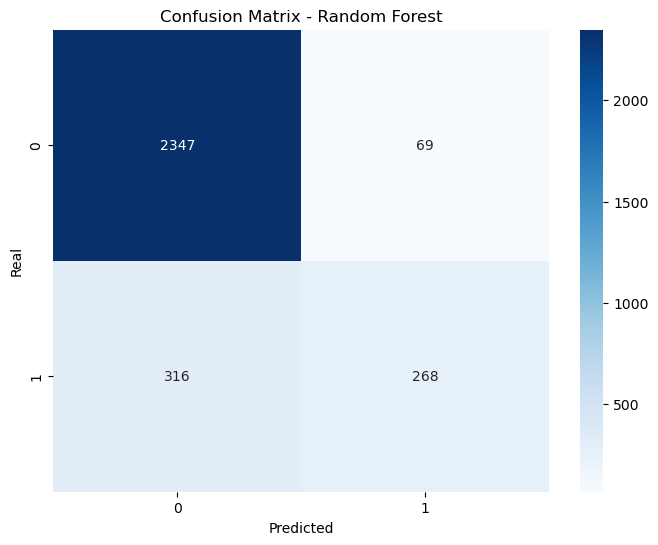

In [231]:
# Creating the confusion matrix using crosstab
confusion_xgb = pd.crosstab(index=y_test, columns=y_pred, rownames=['Real'], colnames=['Predicted'])

# Displaying the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgb, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [232]:
# Defining the parameters to optimize for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [300],
    'max_depth': [15],
    'min_samples_split': [18]
}

# Creating the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Creating the GridSearchCV object
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')

# Fitting the model to the training data
grid_search_rf.fit(X_train, y_train)

# Displaying the best parameters and the best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)


Best Parameters: {'max_depth': 15, 'min_samples_split': 18, 'n_estimators': 300}
Best Accuracy: 0.8588571428571429


In [233]:
# Get the best hyperparameters from the grid search for RandomForestClassifier
best_params_rf = grid_search_rf.best_params_

# Create a RandomForestClassifier with the best hyperparameters
rf_classifier = RandomForestClassifier(**best_params_rf)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance of the model
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the classification report
print(classification_report_rf)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



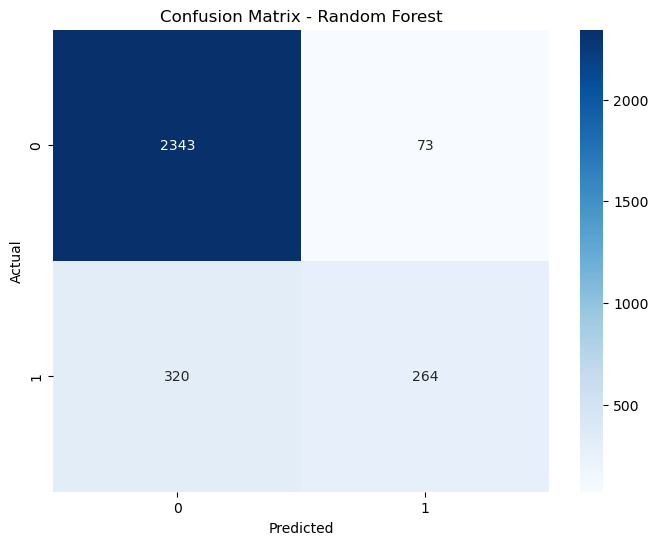

In [234]:
# Creating the confusion matrix using crosstab
confusion_rf = pd.crosstab(index=y_test, columns=y_pred_rf, rownames=['Actual'], colnames=['Predicted'])

# Displaying the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Conclusion:

After a comprehensive analysis of the project, it can be concluded that the XGBoost (XGB) algorithm without outlier removal and pre-processing achieved better results compared to the Random Forest (RF) model. The chosen XGBoost model exhibited the following performance metrics:

- **XGBoost Model:**
  - **Accuracy:** 87%
  - **Precision (Class 0):** 88%
  - **Recall (Class 0):** 97%
  - **F1-score (Class 0):** 92%
  - **Precision (Class 1):** 80%
  - **Recall (Class 1):** 46%
  - **F1-score (Class 1):** 58%

On the other hand, the Random Forest model, which was not selected, demonstrated the following metrics:

- **Random Forest Model:**
  - **Accuracy:** 87%
  - **Precision (Class 0):** 88%
  - **Recall (Class 0):** 97%
  - **F1-score (Class 0):** 92%
  - **Precision (Class 1):** 78%
  - **Recall (Class 1):** 45%
  - **F1-score (Class 1):** 57%

### Key Observations:

1. **XGBoost vs. Random Forest:**
   - The XGBoost model outperformed the Random Forest model, especially in terms of recall for Class 1.
   - The XGBoost model achieved a higher F1-score for Class 1, indicating a better balance between precision and recall.

2. **Outlier Removal and Pre-processing:**
   - Surprisingly, the models performed better without outlier removal and pre-processing. This suggests that the original data distribution, including outliers, contains valuable information for the models.

3. **Considerations:**
   - The decision to prefer the XGBoost model over Random Forest is justified by its superior performance, especially in capturing instances of Class 1, which is often more critical in scenarios like churn prediction.

### Recommendations:

1. **Model Fine-tuning:**
   - Further fine-tuning of hyperparameters for the XGBoost model could be explored to potentially improve its performance.

2. **Feature Engineering:**
   - Investigate potential feature engineering techniques to enhance the representation of the data and further boost model performance.

3. **Continuous Monitoring:**
   - As the dataset evolves, periodically reevaluate the model's performance and consider retraining it with updated data.

4. **Consideration of SMOTE:**
   - Highlight that SMOTE was used; however, it did not result in significant improvements in the model.

In conclusion, the project highlights the importance of thorough experimentation, as the best-performing model may vary depending on the specific characteristics of the dataset. The chosen XGBoost model, without outlier removal and pre-processing, represents a robust solution for the churn prediction task based on the provided results.
